<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/Actividad_Caso__API__UN__Comtrade_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Caso API UN Comtrade

UN COMTRADE es el seudónimo para la base de datos estadística de comercio de las Naciones Unidas, en las cuales más de 170 países o áreas del mundo, llamados reporters, proveen información a la división estadística de las Naciones Unidas con su información anual acerca de comercio e intercambio detallada en categorías de commodities o servicios con sus partners de comercio. Más información en la web oficial de UN Comtrade (https://comtrade.un.org/).

Para la consulta de información, se dispone de una aplicación web de consultas mediante un formulario, así como también una API, la cual tiene acceso público.

- La interfaz de consultas para descargar información se encuentra en el siguiente enlace: https://comtrade.un.org/Data/
- La documentación de la API se encuentra en el siguiente enlace: https://comtrade.un.org/data/doc/api/


Se pide:

- Obtener datos las exportaciones de commodities de Chile para el año 2019 y 2020.
- Hacer un análisis exploratorio de los datos, variables numéricas y categóricas
- Hacer un análisis de valores nulos en el set de datos
- Hacer un análisis de outlaiers
- Aplicar técnicas de limpieza
- Guardar datos limpios en un archivo Excel


Nota: La siguiente uri ya cuenta con los parámetros adecuados para la obtención de los datos solicitados

```python

uri = 'https://comtrade.un.org/api/get/plus?r=152&rg=2&px=HS&ps=2019,2020&type=C&freq=A&p=all&max=100000&cc=AG2'
    
```

#Extraccion de datos desde API

In [1]:
!pip install comtradeapicall
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import comtradeapicall as comtradeapicall
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
comtrade_cl = comtradeapicall.previewFinalData(typeCode='C', freqCode='A', clCode='HS', period='2019,2020',
                                               reporterCode='152', cmdCode='91', flowCode='M', partnerCode = None,
                                               partner2Code=None,
                                               customsCode=None, motCode=None, maxRecords=1000, format_output='JSON',
                                               aggregateBy=None, breakdownMode='classic', countOnly=None, includeDesc=True)

In [5]:
comtrade_cl.head(2)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20190101,2019,52,2019,152,CHL,Chile,M,...,0.000,False,0.000,False,68368764.460,64999164.310,68368764.460,0,False,True
1,C,A,20190101,2019,52,2019,152,CHL,Chile,M,...,0.000,True,0.000,False,364.750,258.000,364.750,4,False,True


In [6]:
#Posee 47 columnas y 152 filas.
comtrade_cl.shape

(152, 47)

## Obtener datos las exportaciones de commodities de Chile para el año 2019 y 2020

In [7]:
# Los datos tienen el período pedido.
comtrade_cl['period'].value_counts()

2020    80
2019    72
Name: period, dtype: int64

## Hacer un análisis exploratorio de los datos, variables numéricas y categóricas

In [8]:
comtrade_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  152 non-null    object 
 1   freqCode                  152 non-null    object 
 2   refPeriodId               152 non-null    int64  
 3   refYear                   152 non-null    int64  
 4   refMonth                  152 non-null    int64  
 5   period                    152 non-null    object 
 6   reporterCode              152 non-null    int64  
 7   reporterISO               152 non-null    object 
 8   reporterDesc              152 non-null    object 
 9   flowCode                  152 non-null    object 
 10  flowDesc                  152 non-null    object 
 11  partnerCode               152 non-null    int64  
 12  partnerISO                152 non-null    object 
 13  partnerDesc               152 non-null    object 
 14  partner2Co

In [9]:
df_tiposvariables = comtrade_cl.dtypes

In [10]:
df_tiposvariables = df_tiposvariables.rename("TipoDatosPython", inplace=True)

In [11]:
df_tiposvariables = pd.DataFrame(df_tiposvariables)

In [12]:
conditions = [
    (df_tiposvariables['TipoDatosPython'] == object),
    (df_tiposvariables['TipoDatosPython'] == 'int64'),
    (df_tiposvariables['TipoDatosPython'] == bool), 
    (df_tiposvariables['TipoDatosPython'] == 'float64')
    ]

values = ['Cualitativa', 'Numérica', 'Cualitativa', 'Numérica']

In [13]:
df_tiposvariables['Variable'] = np.select(conditions, values)

df_tiposvariables

,TipoDatosPython,Variable
typeCode,object,Cualitativa
freqCode,object,Cualitativa
refPeriodId,int64,Numérica
refYear,int64,Numérica
refMonth,int64,Numérica
period,object,Cualitativa
reporterCode,int64,Numérica
reporterISO,object,Cualitativa
reporterDesc,object,Cualitativa
flowCode,object,Cualitativa


### Evaluación Inicial Estadistica Descriptiva

In [14]:
comtrade_cl.describe().T

,count,mean,std,min,25%,50%,75%,max
refPeriodId,152.000,20195364.158,5009.576,20190101.000,20190101.000,20200101.000,20200101.000,20200101.000
refYear,152.000,2019.526,0.501,2019.000,2019.000,2020.000,2020.000,2020.000
refMonth,152.000,52.000,0.000,52.000,52.000,52.000,52.000,52.000
reporterCode,152.000,152.000,0.000,152.000,152.000,152.000,152.000,152.000
partnerCode,152.000,449.849,261.468,0.000,218.000,441.000,699.000,899.000
partner2Code,152.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
aggrLevel,152.000,2.000,0.000,2.000,2.000,2.000,2.000,2.000
motCode,152.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
qtyUnitCode,152.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000
qty,152.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Hacer un análisis de valores nulos en el set de datos
**R.-** Hay valores nulos en el soporte, en los campos 'qtyUnitAbbr' y 'altQtyUnitAbbr'.



In [15]:
print(comtrade_cl['typeCode'].value_counts())
print()
print(comtrade_cl['freqCode'].value_counts())
print()
print(comtrade_cl['flowDesc'].value_counts())
print()
print(comtrade_cl['flowCode'].value_counts())
print()
print(comtrade_cl['refPeriodId'].value_counts())
print()
print(comtrade_cl['refYear'].value_counts())
print()
print(comtrade_cl['refMonth'].value_counts())
print()
print(comtrade_cl['period'].value_counts())
print()
print(comtrade_cl['reporterCode'].value_counts())
print()
print(comtrade_cl['reporterISO'].value_counts())
print()
print(comtrade_cl['partnerISO'].value_counts())
print()
print(comtrade_cl['partnerDesc'].value_counts())
print()
print(comtrade_cl['partner2Code'].value_counts())
print()
print(comtrade_cl['partner2ISO'].value_counts())
print()
print(comtrade_cl['partner2Desc'].value_counts())
print()
print(comtrade_cl['classificationCode'].value_counts())
print()
print(comtrade_cl['classificationSearchCode'].value_counts())
print()
print(comtrade_cl['isOriginalClassification'].value_counts())
print()
print(comtrade_cl['cmdCode'].value_counts())
print()
print(comtrade_cl['cmdDesc'].value_counts())
print()
print(comtrade_cl['aggrLevel'].value_counts())
print()
print(comtrade_cl['isLeaf'].value_counts())
print()
print(comtrade_cl['customsCode'].value_counts())
print()
print(comtrade_cl['customsDesc'].value_counts())
print()
print(comtrade_cl['mosCode'].value_counts())
print()
print(comtrade_cl['motCode'].value_counts())
print()
print(comtrade_cl['motDesc'].value_counts())
print()
print(comtrade_cl['qtyUnitCode'].value_counts())
print()
print(comtrade_cl['qtyUnitAbbr'].value_counts())
print()
print(comtrade_cl['qty'].value_counts())
print()
print(comtrade_cl['isQtyEstimated'].value_counts())
print()
print(comtrade_cl['altQtyUnitCode'].value_counts())
print()
print(comtrade_cl['altQty'].value_counts())
print()
print(comtrade_cl['isAltQtyEstimated'].value_counts())
print()
print(comtrade_cl['netWgt'].value_counts())
print()
print(comtrade_cl['isNetWgtEstimated'].value_counts())
print()
print(comtrade_cl['grossWgt'].value_counts())
print()
print(comtrade_cl['legacyEstimationFlag'].value_counts())
print()
print(comtrade_cl['isReported'].value_counts())
print()
print(comtrade_cl['isAggregate'].value_counts())

C    152
Name: typeCode, dtype: int64

A    152
Name: freqCode, dtype: int64

Import    152
Name: flowDesc, dtype: int64

M    152
Name: flowCode, dtype: int64

20200101    80
20190101    72
Name: refPeriodId, dtype: int64

2020    80
2019    72
Name: refYear, dtype: int64

52    152
Name: refMonth, dtype: int64

2020    80
2019    72
Name: period, dtype: int64

152    152
Name: reporterCode, dtype: int64

CHL    152
Name: reporterISO, dtype: int64

W00    2
MYS    2
IND    2
SAU    2
AIA    2
      ..
KHM    1
JAM    1
CRI    1
BOL    1
UZB    1
Name: partnerISO, Length: 84, dtype: int64

World                               2
Malaysia                            2
India                               2
Saudi Arabia                        2
Anguilla                            2
                                   ..
Cambodia                            1
Jamaica                             1
Costa Rica                          1
Bolivia (Plurinational State of)    1
Uzbekistan             

In [16]:
def convertir(valor):
  try:
    return float(valor)
  except:
    return np.nan

In [17]:
comtrade_cl['qtyUnitAbbr'] = comtrade_cl['qtyUnitAbbr'].apply(convertir)
comtrade_cl['altQtyUnitAbbr'] = comtrade_cl['altQtyUnitAbbr'].apply(convertir)

In [18]:
comtrade_cl.isna().sum()

typeCode                      0
freqCode                      0
refPeriodId                   0
refYear                       0
refMonth                      0
period                        0
reporterCode                  0
reporterISO                   0
reporterDesc                  0
flowCode                      0
flowDesc                      0
partnerCode                   0
partnerISO                    0
partnerDesc                   0
partner2Code                  0
partner2ISO                   0
partner2Desc                  0
classificationCode            0
classificationSearchCode      0
isOriginalClassification      0
cmdCode                       0
cmdDesc                       0
aggrLevel                     0
isLeaf                        0
customsCode                   0
customsDesc                   0
mosCode                       0
motCode                       0
motDesc                       0
qtyUnitCode                   0
qtyUnitAbbr                 152
qty     

<Axes: >

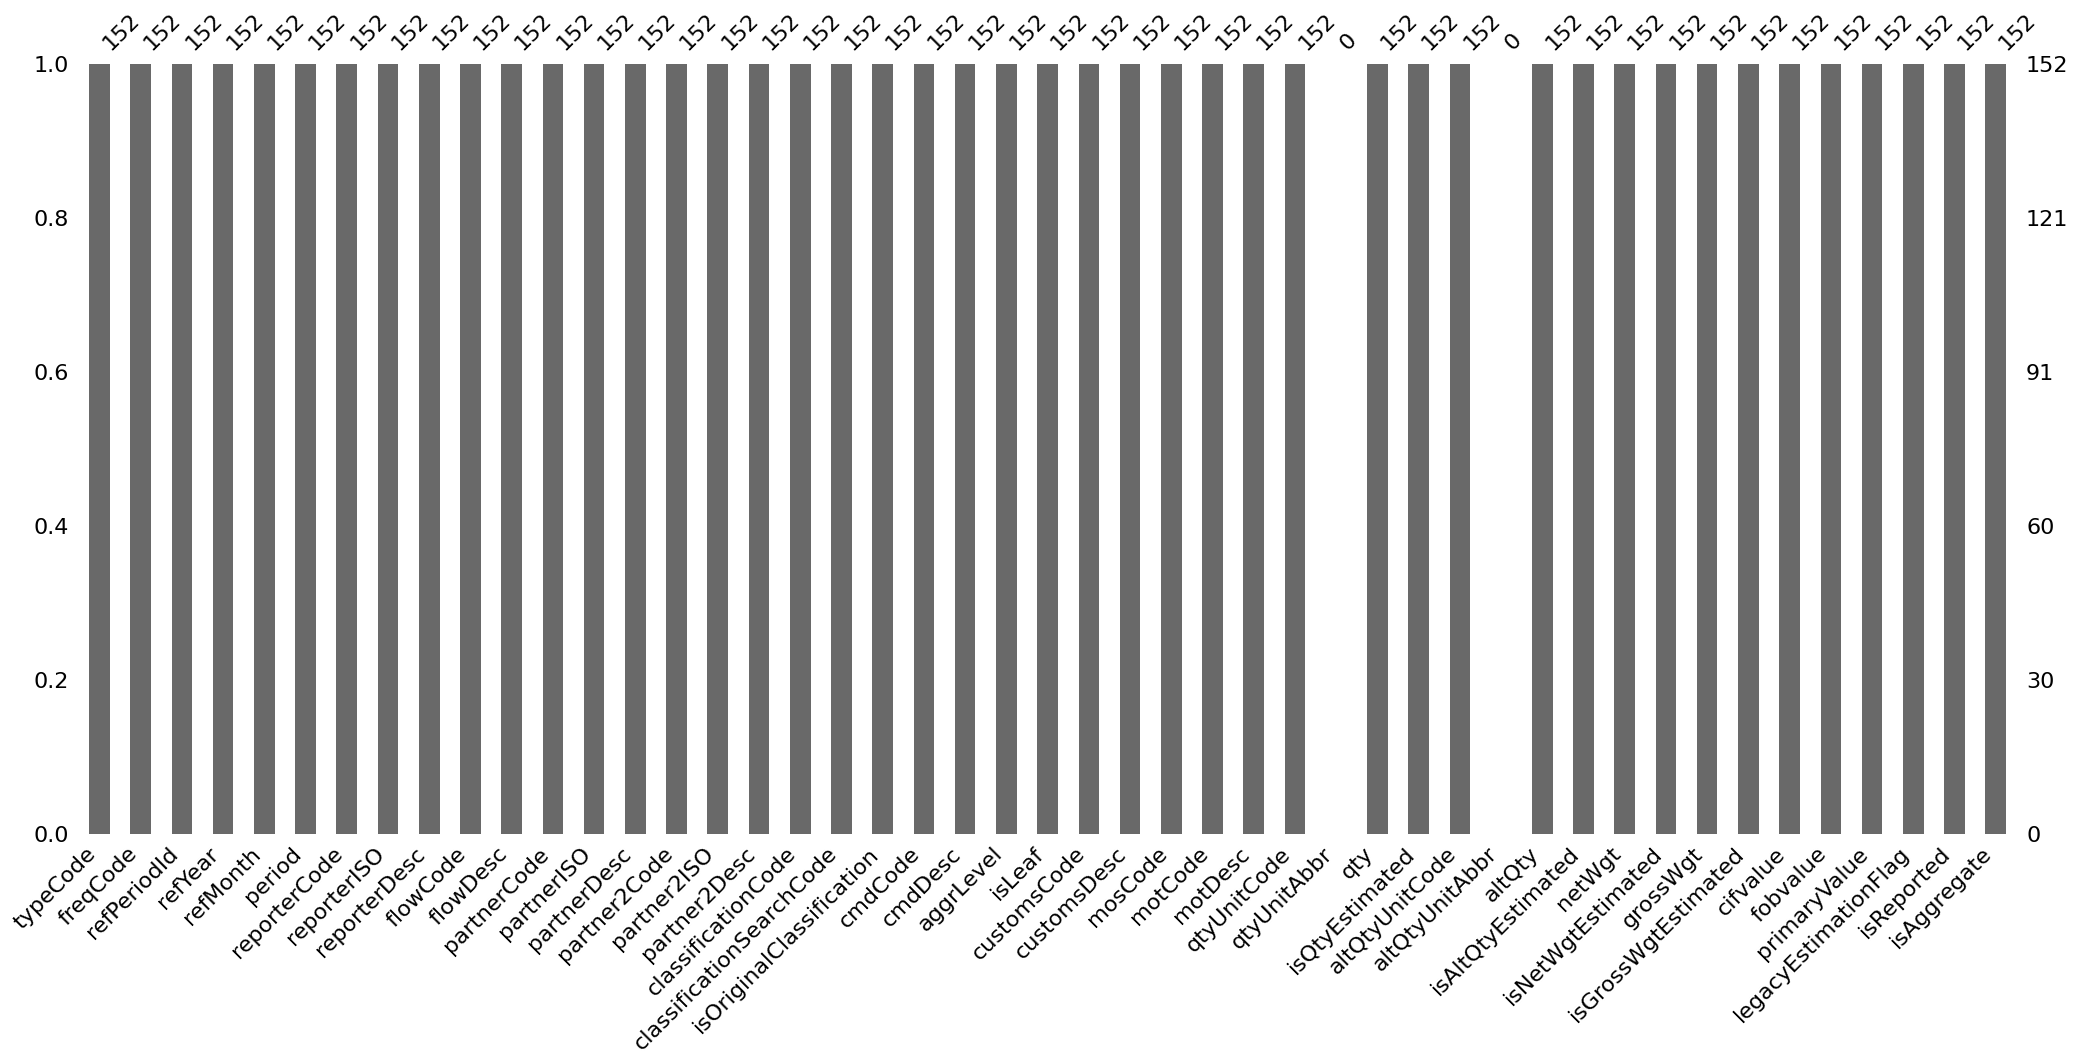

In [19]:
#Plot para ver los datos faltantes

msno.bar(comtrade_cl)

## Hacer un análisis de outlaiers

### Método aritmetico para encontrar outlaiers

In [20]:
def busqueda_anomalos_IQR(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  outliers = df[((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 *IQR)))]
  return outliers

In [21]:
outliers1 = busqueda_anomalos_IQR(comtrade_cl['cifvalue'])
outliers2 = busqueda_anomalos_IQR(comtrade_cl['fobvalue'])
outliers3 = busqueda_anomalos_IQR(comtrade_cl['primaryValue'])

print("Análsis de 'cifvalue'")
print("Total de outliers: " + str(len(outliers1)))
print("Valor outlier mínimo: " + str(outliers1.min()))
print("Valor outlier máximo: " + str(outliers1.max()))
print()
print("Análsis de 'fobvalue'")
print("Total de outliers: " + str(len(outliers2)))
print("Valor outlier mínimo: " + str(outliers2.min()))
print("Valor outlier máximo: " + str(outliers2.max()))
print()
print("Análsis de 'primaryValue'")
print("Total de outliers: " + str(len(outliers3)))
print("Valor outlier mínimo: " + str(outliers3.min()))
print("Valor outlier máximo: " + str(outliers3.max()))

Análsis de 'cifvalue'
Total de outliers: 31
Valor outlier mínimo: 193991.8
Valor outlier máximo: 68368764.46

Análsis de 'fobvalue'
Total de outliers: 31
Valor outlier mínimo: 189949.87
Valor outlier máximo: 64999164.31

Análsis de 'primaryValue'
Total de outliers: 31
Valor outlier mínimo: 193991.8
Valor outlier máximo: 68368764.46


### Histogramas para ver valores atípicos



In [22]:
fig1 = px.histogram(comtrade_cl, x = 'cifvalue')

fig1.show()

In [23]:
fig2 = px.histogram(comtrade_cl, x = 'fobvalue')

fig2.show()

In [24]:
fig2 = px.histogram(comtrade_cl, x = 'primaryValue')

fig2.show()

### Box-Plot's para ver valores atípicos

<Axes: >

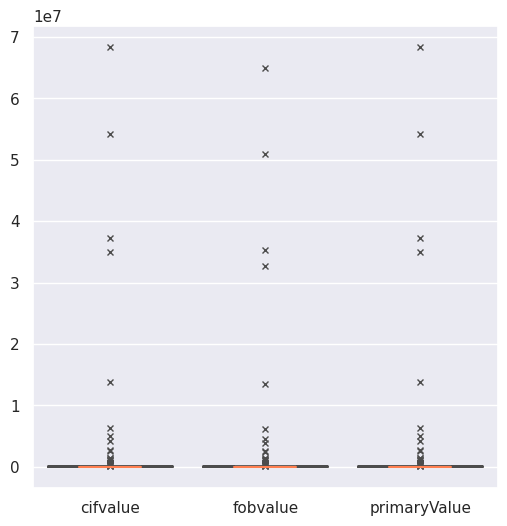

In [25]:
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = comtrade_cl[['cifvalue', 'fobvalue','primaryValue']], orient="v",
            flierprops={"marker": "x"},notch=True, showcaps=False,
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})

### Scatterplot's para ver valores atípicos

<Axes: xlabel='cifvalue', ylabel='primaryValue'>

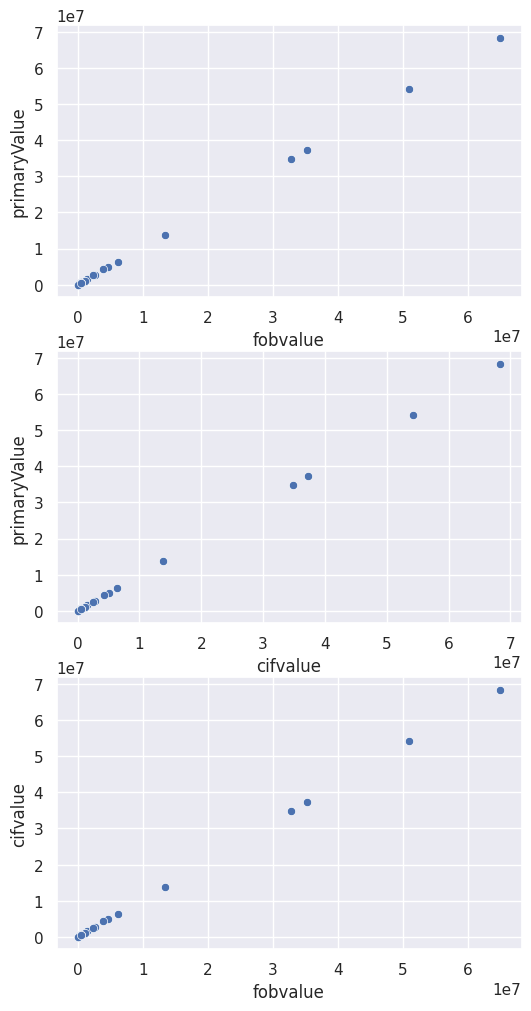

In [26]:
sns.set(rc={'figure.figsize':(6,12)})
fig, axs = plt.subplots(nrows=3)

sns.scatterplot(data = comtrade_cl, x = 'fobvalue', y = 'primaryValue',ax=axs[0])
sns.scatterplot(data = comtrade_cl, x = 'fobvalue', y = 'cifvalue',ax=axs[2])
sns.scatterplot(data = comtrade_cl, x = 'cifvalue', y = 'primaryValue',ax=axs[1])


### Algoritmo para poder ver valores anómalos
**ABOD** para detección de valores atípicos de base angular. Para una observación, la varianza de sus puntajes de coseno ponderados con respecto a todos los vecinos podría verse como el puntaje atípico.

In [27]:
abod_clf1 = ABOD(contamination = 0.1, n_neighbors = 5, method = 'default')
abod_clf1.fit(comtrade_cl[['fobvalue', 'cifvalue']])

abod_clf2 = ABOD(contamination= 0.15, n_neighbors = 5, method = 'default')
abod_clf2.fit(comtrade_cl[['fobvalue', 'primaryValue']])

abod_clf3 = ABOD(contamination= 0.1, n_neighbors = 5, method= 'default')
abod_clf3.fit(comtrade_cl[['cifvalue', 'primaryValue']])

ABOD(contamination=0.1, method='default', n_neighbors=5)

In [28]:
comtrade_cl['ABOD_Clf1'] = abod_clf1.labels_
comtrade_cl['ABOD_Clf2'] = abod_clf2.labels_
comtrade_cl['ABOD_Clf3'] = abod_clf3.labels_

<Axes: xlabel='cifvalue', ylabel='primaryValue'>

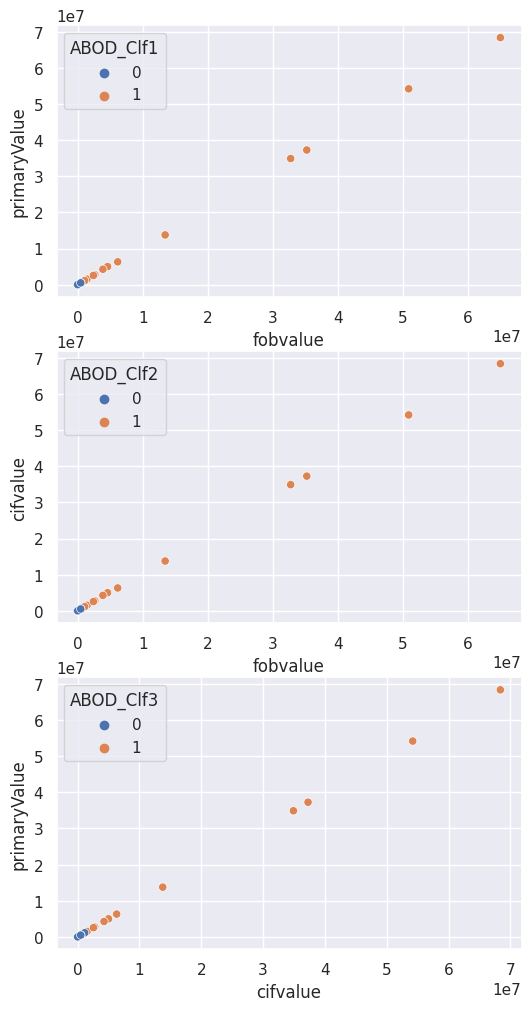

In [29]:
sns.set(rc={'figure.figsize':(6,12)})
fig, axs = plt.subplots(nrows=3)

sns.scatterplot(data = comtrade_cl, x = 'fobvalue', y = 'primaryValue',ax=axs[0], hue = 'ABOD_Clf1')
sns.scatterplot(data = comtrade_cl, x = 'fobvalue', y = 'cifvalue',ax=axs[1], hue = 'ABOD_Clf2')
sns.scatterplot(data = comtrade_cl, x = 'cifvalue', y = 'primaryValue',ax=axs[2], hue = 'ABOD_Clf3')

## Aplicar técnicas de limpieza

### Eliminar campos que tengan valores nulos


In [30]:
del comtrade_cl['typeCode'] #Un solo valor 
del comtrade_cl['freqCode'] #Un solo valor 
del comtrade_cl['flowDesc'] #Un solo valor 
del comtrade_cl['flowCode'] #Un solo valor 
del comtrade_cl['refYear']  #Se repite el año en 'period'
del comtrade_cl['refMonth'] #Un solo valor
del comtrade_cl['refPeriodId'] #Se repite el año en 'period'
del comtrade_cl['reporterCode'] #Un solo valor
del comtrade_cl['reporterISO'] #Un solo valor
del comtrade_cl['partnerISO'] # 'partnerDesc' descibre a los paises que exportan
del comtrade_cl['partner2Code'] #Relleno de ceros
del comtrade_cl['partner2ISO'] #Un solo valor
del comtrade_cl['partner2Desc'] #Un solo valor
del comtrade_cl['classificationCode'] #Un solo valor
del comtrade_cl['classificationSearchCode'] #Un solo valor
del comtrade_cl['isOriginalClassification'] #Un solo valor
del comtrade_cl['cmdCode'] #Un solo valor
del comtrade_cl['aggrLevel'] #Un solo valor
del comtrade_cl['isLeaf'] #Un solo valor
del comtrade_cl['customsCode'] #Un solo valor
del comtrade_cl['customsDesc'] #Un solo valor
del comtrade_cl['mosCode'] #Relleno de ceros
del comtrade_cl['motCode'] #Relleno de ceros
del comtrade_cl['motDesc'] #Un solo valor
del comtrade_cl['qtyUnitCode'] #Relleno de -1's
del comtrade_cl['qtyUnitAbbr'] #Relleno de NaN
del comtrade_cl['qty'] #Relleno de ceros
del comtrade_cl['isQtyEstimated'] #Un solo valor
del comtrade_cl['altQtyUnitCode'] #Relleno de -1's
del comtrade_cl['altQty'] #Relleno de ceros
del comtrade_cl['isAltQtyEstimated'] #Un solo valor
del comtrade_cl['netWgt'] #Relleno de ceros
del comtrade_cl['grossWgt'] #Relleno de ceros
del comtrade_cl['isReported'] #Un solo valor
del comtrade_cl['isAggregate'] #Un solo valor
del comtrade_cl['altQtyUnitAbbr'] #Relleno de NaN
del comtrade_cl['isGrossWgtEstimated'] #Relleno de un valor unico

In [31]:
comtrade_cl.head(5)

,period,reporterDesc,partnerCode,partnerDesc,cmdDesc,isNetWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,ABOD_Clf1,ABOD_Clf2,ABOD_Clf3
0,2019,Chile,0,World,Clocks and watches and parts thereof,False,68368764.460,64999164.310,68368764.460,0,1,1,1
1,2019,Chile,8,Albania,Clocks and watches and parts thereof,True,364.750,258.000,364.750,4,0,0,0
2,2019,Chile,32,Argentina,Clocks and watches and parts thereof,True,49642.730,46393.200,49642.730,4,0,0,0
3,2019,Chile,36,Australia,Clocks and watches and parts thereof,True,18389.480,17673.480,18389.480,4,0,0,0
4,2019,Chile,40,Austria,Clocks and watches and parts thereof,True,64274.060,59676.070,64274.060,4,0,0,0


In [32]:
comtrade_cl.describe().T

,count,mean,std,min,25%,50%,75%,max
partnerCode,152.000,449.849,261.468,0.000,218.000,441.000,699.000,899.000
cifvalue,152.000,1612661.139,8186948.009,23.810,772.133,9310.170,72437.073,68368764.460
fobvalue,152.000,1525022.845,7744035.388,10.000,649.237,8432.455,63516.739,64999164.310
primaryValue,152.000,1612661.139,8186948.009,23.810,772.133,9310.170,72437.073,68368764.460
legacyEstimationFlag,152.000,3.368,1.463,0.000,4.000,4.000,4.000,4.000
ABOD_Clf1,152.000,0.105,0.308,0.000,0.000,0.000,0.000,1.000
ABOD_Clf2,152.000,0.151,0.360,0.000,0.000,0.000,0.000,1.000
ABOD_Clf3,152.000,0.105,0.308,0.000,0.000,0.000,0.000,1.000


## Guardar datos limpios en un archivo Excel

In [33]:
from google.colab import files


comtrade_cl.to_csv("comtrade_cl_Wranglir.csv") 
files.download("comtrade_cl_Wranglir.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>